# Introduction


This notebook is a technical review of the elements in this Jupyter notebok repository.


* [Python Data Science Handbook by Jake VanderPlas]((https://jakevdp.github.io/PythonDataScienceHandbook/) (abbreviated herein PDSH).
* [GitHub Markdown Cheat Sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)


## Elements


- Earlier organizational ideas
    - Defers utility code to the supporting BioOpticsModule.py file
    - Decomposition of pressure/time to infer **profile timing metadata**
    - Daily profile chart illustrating nine profiles including noon/midnight variants
    - **Depth** vs { **Temp, Dissolved Oxygen, Salinity, Chlor-A, FDOM (CDOM), backscatter** }
    - (placeholder) Depth vs pCO2: midnight/noon descent
    - **Depth vs pH**: midnight/noon descent
    - **Depth vs { Spectral Irradiance }**: midnight/noon ascent 
    - **Depth vs PAR (continuous) and nitrate** (midnight/noon ascent)
    - **Depth vs current** including turbulence
    - Comparison: **Shallow profiler versus discrete CTD cast data from cruises**
- Notebooks sub-folder
    - Ocean 01 A: Parent of BioOptics: Slated to be subsumed / deleted
    - Ocean 01 B/C/D/E/F: Likewise: Development code and docs, to be subsumed / deleted
    - Ocean 01 G: Compares ascent data to descent data from continuous sensors
    - Ocean 01 H: Compares Science Pod at rest on platform with platform sensors
    - Ocean 01 K: Further background on bio-optical sensors (no spectrophotometer)
    - Ocean 01 L: Initial attempts at differentiation with respect to depth
    - Ocean 01 M: **Spectrophotometer**: Disabled pending source data refresh
    - Ocean 02: Sea Surface = **MODIS Aqua surface chlorophyll**, broken pending refresh
    - Ocean 03 **ARGO**: ARGO compared with RCA (nbk broken pending source data refresh) 
    - Ocean 04 Global Ocean: Depth-wise global explorer for GLODAP temp/salinity/DO (refresh needed)
    - Ocean 05 A **Sea Floor Axial Inflation**: Tilt and pressure data at ASHES vent field
    - Ocean 05 B Sea Floor Background: Backing resources / documentation for 05 A above
    - Ocean 06 Science: Notes on global carbon cycle
    - Ocean 07 Data Acquisition: Notes on getting datasets (refresh needed) 
    - Ocean 08 **Programming Resources**: Fairly careful notes on methods used in the above notebooks
- Missing: OSU sea surface anomaly time series maps, animals

- Import, play, modify sound files (broadband hydrophone)
- PyGMT for mapping
- Docker containers for processing data
- Interactive data annotation using the cursor
- Create / embed data animations and related video (including from external sources like YouTube)
- Create / embed static images (particularly data charts)
- Three-dimensional charting in Jupyter and non-Jupyter contexts
- Shell integration built into IPython e.g. `Video(os.getcwd() + '/sub-path/data.mp4', embed=True)`
- `numpy` / `pandas` / `xarray` / `matplotlib` / `holoview` / `ipywidgets` details and notes on effective use
- Managing data; includes missing data and resampling
- Obtaining datasets from OOI and other sources
- Integrating remote sensing data
- Time
- Instruments (includes *sensors* and *streams* in OOI usage)
- Shallow profiler 
    - ascent/descent/rest cycles
    - low-rate instruments
    - high-rate instruments
- Ecosystem: bash, text editor, git, GitHub, Python, nbpuller, Binder
    - Basic Python / IPython / notebook~module coding strategy
    - Python `matplotlib`, `numpy`, `pandas`, and `xarray`
    - interactive widgets, maps (`PyGMT`), animation, colormap use, ...
    - Jupyter notebooks
        - Tables, markdown, embedding, LaTeX, ...
        - Server options
- Ordering, retrieving and cleaning datasets from OOI
    - Deconstructing datasets
- Pulling other data (besides shallow profiler) from the OOI data system
- Pulling datasets from other programs: ARGO, MODIS, GLODAP, ROMS, MSLA, etcetera
- Working from larger extra-repo datasets

## To Do


- merge() ...?... 
    - Order: `.merge()` then `.resample()` with `mean()`; or vice versa? (existing code is vice-versa)
    - This approach does resampling prior to merge but was taking way too long
- resampling

```
ds = ds.reset_coords('seawater_pressure')        # converts the coordinate to a data variable
ds_mean = ds.resample(time='1Min').mean()
ds_std  = ds.resample(time='1Min').std()
```

- How to copy a dataset, how to move a coordinate to a data variable


- Load R/M Dataset ctdpf + flort
    * Some data are noisier towards the surface, some are ridiculously noisy. 
    * Idea: Filter on standard deviation, threshold:
        * Filter leaves a signal of interest? 
    * Fluorometer is particularly troublesome. 


- Depth profiles reduce to simple metrics
    * profile start, peak, end times
    * platform residence: start and end times (from profile times)
    * (smoothed) chlorophyll derivative, curvature, rate of curvature
    * Similarly salinity seems to go through a consistent double-zero in rate of curvature
    * intersection depth as used in TDR; for example for temperature or salinity
        * extrapolate smoothed pressure by backing off the derivative change
        * extrapolate platform, intersect
    * time of day / sun angle
    * local time
    * rate of ascent verify; 3m / minute?
    
    
    
- platform coincident data agree with profiler
- Deal with two older images:
    - ./images/misc/optaa_spectra_0_10_20_JAN_2019.png
    - ./images/misc/nitrate_2019_JAN_1_to_10.png
- pH sensor fire once at the end of every profile; back in the platform***
- Manufacturer etc: [here](https://interactiveoceans.washington.edu/instruments/).
- ...but the DataArray can itself be invoked with `.attrs` to see additional attributes that are invisible

```
ds.density.attrs
```

- Optical absorption spectrophotometer
    * Seabird Scientific (acquired WETLABS): 'AC-S' model (shallow profilers)
        * 86 wavelengths per sample; in practice some nan values at both ends
        * Interview Chris for more procedural / interpretive SME
        * Operates only during shallow profiler ascents
            * Only on the two "nitrate" ascents each day
            * One sample per 0.27 seconds
                * However it often does a "skip" with a sample interval about 0.5 seconds
        * Spectral absorption: parameter `a`, values typically 20 - 45. 
        * Attenuation is `c` with values on 0 to 1.
        * Coordinates we want are `time`, `int_ctd_pressure`, `wavelength`
            * `time` and `wavelength` are also dimensions
        * Data variables we want are `beam_attenuation` (this is `c`) and `optical_absorption` (`a`)
        * Per year data is about 1.7 billion floating point numbers
            * 86 wavelengths x 2 (c, a) x 2 (ascent / day) x 14,000 (sample / ascent) x 365

        

- Photosynthetically Active Radiation (PAR)
    * Devices mounted on the shallow profiler and the SP platform
    * Seabird Scientific (from acquisition of Satlantic): PAR model
    * Some ambiguity in desired result: `par`, `par_measured` and `par_counts_output` are all present in the data file
        * Since `qc` values are associated with it I will simply use `par_counts_output`
        
        
- Fluorometer
    * WETLABS (Seabird Scientific from acquisition) Triplet
    * Chlorophyll emission is at 683 nm
    * Measurement wavelengths in nm are 700.0 (scattering), 460.0 (cdom) and 695.0 (chlorophyll)
    * Candidate Data variables
        * Definites are `fluorometric_chlorophyll_a` and `fluorometric_cdom`
        * Possibles are `total_volume_scattering_coefficient`, `seawater_scattering_coefficient`, `optical_backscatter`
            * qc points to total volume scattering and optical backscatter but I'll keep all three
  
  
- Nitrate nutnr_a_sample and nutnr_a_dark_sample
    * The nitrate run ascent is ~62 minutes (ascent only); ~3 meters per minute
        * Ascent is about 14,000 samples; so 220 samples per minute
        * That is 70 samples per meter depth over 20 seconds
        * Per the User's Manual post-processing gets rather involved


- pCO2 water (two streams: pco2w_b_sami_data_record and pco2w_a_sami_data_record)


## [Table of Contents](#Table-of-Contents)


* [Tables](#Tables)
* [Data](#Data)
* [Markdown](#Markdown)
    * Includes [LaTeX math formulas](#LaTeX-math-formulas)
* [Reducing Datasets](#Reducing-Datasets)
    * [One minute resampling](#One-minute-resampling)
    * [Selecting based on a range](#Selecting-based-on-a-range)
* [Numpy ndarrays](#Numpy-ndarrays)
* [Time](#Time)
* [ipywidgets](#ipywidgets)
* [HoloView](#Holoview)
* [Instruments](#Instruments)
* [Binder](#Binder)


Misplaced:

* [Plotting](#Plotting)
    * [Making animations](#Making-animations)
* [Multimedia](#Multimedia)
    * [Images](#Images)
    * [Animations](#Animations)
    * [YouTube video playback](#YouTube-video-playback)
    * [Sound clips](#Sound-clips)
* [XArray Datasets and DataArrays](#XArray-Datasets-and-DataArrays)
* [Pandas Series and DataFrames](#Pandas-Series-and-DataFrames)

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)

## Tables


Possible finesse: Left-justify tables: `<style>table {float:left}</style>`


Can be done in Markdown using pipes; or using HTML. Pipe tables with many columns can get buggy.
In Python cells: HTML via `%%html` cell magic.

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned | \$1600 |
| col 2 is      | centered      |   \$12 |





In [20]:
%%html

<br>
Here is a table and additional HTML content... from within a Python cell using %%html cell magic.
<br>

<!DOCTYPE html>
<html>

<body>
    <table>
        <tr>
            <th>Book</th>
            <th>Author</th>
            <th>Genre</th>
        </tr>
        <tr>
            <td>Thief</td>
            <td>Zusak</td>
            <td>Made It Up</td>
        </tr>
        <tr>
            <td>$x = \pi$</td>
            <td>Holly Berry</td>
            <td>Mathematics</td>
        </tr>
        <tr>
            <td>Silence</td>
            <td>Burden of Dreams</td>
            <td>Climbing</td>
        </tr>
    </table>
</body>

</html>

Book,Author,Genre
Thief,Zusak,Made It Up
$x = \pi$,Holly Berry,Mathematics
Silence,Burden of Dreams,Climbing


<br>
Here is the same table and additional HTML content... from within a markdown cell
<br>

<!DOCTYPE html>
<html>

<body>
    <table>
        <tr>
            <th>Book</th>
            <th>Author</th>
            <th>Genre</th>
        </tr>
        <tr>
            <td>Thief</td>
            <td>Zusak</td>
            <td>Made It Up</td>
        </tr>
        <tr>
            <td>$x = \pi$</td>
            <td>Holly Berry</td>
            <td>Mathematics</td>
        </tr>
        <tr>
            <td>Silence</td>
            <td>Burden of Dreams</td>
            <td>Climbing</td>
        </tr>
    </table>
</body>

</html>

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)


## Data


The primary data resource in this repository is the NSF-sponsored Ocean Observations Initiative (OOI) program.
This consists of a set of about eight *arrays*, which can be thought of as independent observatories. 

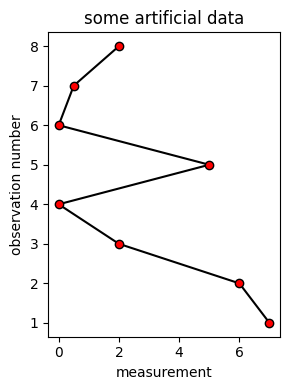

In [4]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(figsize=(3,4), tight_layout=True)
axs.plot([7, 6, 2, 0, 5, 0, 0.5, 2], [1, 2, 3, 4, 5, 6, 7, 8], marker='.', markersize=12, color='black', markerfacecolor='red')
axs.set_title('some artificial data'); axs.set_ylabel('observation number'); axs.set_xlabel('measurement'); plt.show()

### Data download


[OOI](https://oceanobservatories.org) provides the [Data Explorer](https://dataexplorer.oceanobservatories.org/).
An alternative resource that is particular to the *OOI cabled array* is the
[Cabled Array data server](https://interactiveoceans.washington.edu).
This site is oriented towards built-in data exploration and it is very educator-friendly. 


#### Example download


- Source: OOI
    - Qualifiers: Fluorometer (Chlorophyll), March 2021 example, Oregons Slope Base site, shallow profiler
- > [Data access page in the Data Explorer](https://dataexplorer.oceanobservatories.org/#go-to-data-access)
    - > Oregon Margin, Profiling Assets, Fluorometer, All Parameters (+ Go)
- Five choicie tabs: **Data**, **Inventory**, **Downloads**, **Annotations**, **Deployments**
    - > **Downloads**
    - > green **Downloads** button for { Oregon Slope Base, Shallow Profiler, Chlorophyll-A}
    - Choose link '*full resolution downloads*'
        - This leads to a page of datasets for the fluorometer in sequence of deployment, giving some time-range choice
        - Select Downloads > THREDDS Catalog > Dataset to go to a page listing files
        - Deployment 8, FLORT for the triplet; check time range in filename for best match to March 2021
        - Click to go to yet another page, this one for "ACCESS" and multiple choices
            - Select HTTPServer to download the NetCDF data file: 600+ MB
    - Raw data alternative to **full resoliution**
        - Green **Download** button for various streams / sensors 
        - The Download button presents three format options: ERDDAP (with 3 sub-options), CSV and NetCDF
            - The NetCDF URL copy gives 
[this link](https://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-rs01sbps-sf01a-3a-flortd101.nc?time%2Cmass_concentration_of_chlorophyll_a_in_sea_water_profiler_depth_enabled%2Cz)
which in turn initiates a download, making the download link shareable
            - The NetCDF **Download** button downloads a downsampled data file to the local machine
                - In this case the file size is 184MB; and these data are ***one sample per minute***
                - For completeness we might also download the FDOM ("CDOM") and Optical Backscatter files (same size)
            - At no point did we constrain the data to a particular time range: The data run 2014 to 2022
            - The data description text with the small chart symbol at left is also a link: This attempts to create a curtain plot in the browser
            
            
### Data manipulation

#### XArray Dataset operations


- Copy: `dsc = ds.copy()`
- Coordinate to data variable: `ds = ds.reset_coords('seawater_pressure')`

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)

## Markdown

See above for tables. This continues with some other examples.


<BR>
<img src="../Images/people/dubious.png" style="float: left;" alt="picture: dubious child" width="120"/>
<div style="clear: left">
<BR><BR>
    


- bullet
- lists


```
'blocks of code...'
# with fixed font width
```


> "quotation-style" text



#### Needed: Embed YouTube videos

    
### LaTeX math formulas 

$LaTeX^{\pi}$
    
Single dollar-sign delimiters put content inline: `$e^x = \sum_{i=0}^{\infty}{\frac{x^i}{i!}}$` looks like this: $e^x = \sum_{i=0}^{\infty}{\frac{x^i}{i!}}$. 


Double dollar-sign delimiters create a centered equation:


$$e^x = \sum_{i=0}^{\infty}{\frac{x^i}{i!}}$$


Change size for example with a `\Large` qualifier:


$\Large{e^x = \sum_{i=0}^{\infty}{\frac{x^i}{i!}}}$


#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)



## Reducing Datasets



### Summary


As a good reference for manipulating data see Jake VanDerplas' book
Python Data Science Handbook. 


We have here multi-dimensional oceanography datasets bundled as
NetCDF or CSV files. Corresponding Python modules are `XArray` and `pandas`.
On import these are abbreviated `xr` and `pd` respectively.


XArray has a method `.open_dataset('file.nc')` returning an XArray Dataset. 
A Dataset is a collection of XArray DataArray structures. The important structural
feature of a Dataset is that it includes four sections: `Dimensions`, 
`Coordinates`, `Data Variables`, and `Attributes`. To examine a Dataset
called `A`: Create an empty cell, type `A`, and run it. This will give a 
breakdown of `A` in terms of these four constituent sections. 


In pandas the data structure of interest is a DataFrame. DataFrames are used 
extensively in these notebooks to manage profile metadata for shallowo profilers.
For more on this see the accompanying Technical Guide. 


Common reductive steps once data are read include removing extraneous components from
a dataset, downsampling, removing NaN values, changing the primary `dimension`
from `obs` (for 'observation') to `time`, combining multiple data files into 
a single dataset, saving modified datasets to new files, and creating data charts. 


One reason datasets are reduced in size is to enable them to reside within this
[GitHub repository](https://github.com/robfatland/ocean)
without exceeding memory size limits. If large datasets are still
needed, they can be downloaded by a notebook. This is a further means of reducing
repo size. An example of this download-as-needed using `wget`
is in the **`Global Ocean`** notebook.
The five data files downloaded used in that notebook are each 17MB, reduced 
from 100MB by the following Python code which retains only data of interest.



```
# Reduce volume of an XArray Dataset with extraneous Data Variables:
T=xr.open_dataset('glodap_oxygen.nc')
T.nbytes
T=T[['temperature', 'Depth']]
T.nbytes
T.to_netcdf('temperature.nc')      
```


Specific to the RCA shallow profilers: Data collected during ascent spans 200 meters
of water column depth in one hour, about 6 cm / sec. To perceive
a 'thin layer' signal suggests starting from high rate data (example: one sample
/ sec) and averaging -- if at all -- to a guess at minimum layer thickness.
More in the spirit of XArray would be to resample based on depth bins.


As an aside, one of the challenges of working with complex data formats such as
XArray Datasets is learning how to access data subsets. While this repository 
is not a comprehensive guide it does include a number of examples.

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)


### Oregon Slope Base shallow profiler sensor abbreviation table 


| abbrev | sensors |remarks|
|--|--|--|
|ctdpf|3|CTD: includes salinity, temperature, dissolved oxygen
|pco2|1|carbonate chemistry, midnight and noon *descent* only
|phsen|1|pH, midnight and noon *descent* only
|nutnr|2|nitrate, dark samples; midnight and noon *ascent* only
|flort|3|Fluorometer triplet: chlorophyll-A, FDOM, backscatter ('bb700')
|spkir|7|downwelling spectral irradiance, 7 frequency bands
|parad|1|photosynthetically available radiation 'PAR'
|optaa|86|spectrophotometer: 86 frequency bands, ascent local noon and midnight only

### Slow resampling problem


The shallow profiler spectrophotometer has 86 channels. Each observation has 
a corresponding depth and time, typically several thousand per profile.
The XArray Dataset has `time` swapped in for `obs` dimension but we are 
interested in resampling into depth bins. This took hours; which was 
puzzling. However page 137 of PDSH, on **Rearranging Multi-Indices**
and **Sorted and unsorted indices** provides this resolution: 

> ***Rearranging Multi-indices***<BR>
One of the keys to working with multiply indexed data is knowing how to effectively 
transform the data. There are a number of operations that will preserve all the 
information in the dataset, but rearrange it for the purposes of various computations. 
[...] There are many [ways] to finely control the rearrangement
of data between heirarchical indices and columns.
    
> ***Sorted and unsorted indices***<BR>
Earlier, we briefly mentioned a caveat, but we should emphasize it more here. 
*Many of the `MultiIndex`slicing operations will fail if the index is not sorted.*

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)


### One minute resampling




`XArray Datasets` feature selection by time range: `ds.sel(time=slice(timeA, timeB))`
and resampling by time interval: `ds.resample(time='1Min').mean()`. 
(Substitute `.std()` to expand into standard deviation signals.)


```
ds = xr.open_dataset(ctd_data_filename)
tJan1 = dt64('2019-01-01')
tFeb1 = dt64('2019-02-01')
ds = ds.sel(time=slice(tJan1, tFeb1))
ds1Min = ds.resample(time='1Min').mean()
```



The problem however is that the resample() execution in the code above
can hang. The select operation `.sel()` is not understood by XArray as a monotonic
time dimension monotonic. It may be treated as a jumble even if it is not! 
This can become even more catastrophic when other dimensions are present. 
The following work-around uses `pandas Dataframes`. 



This code moves the 
XArray Dataset contents into a pandas DataFrame.
Here they are resampled properly; and the resulting
columns are converted into a list of XArray DataArrays.
These are then combined to form a new Dataset with 
the desired resampling completed quickly. 



```
df   = ds.to_dataframe().resample("1Min").mean()
vals = [xr.DataArray(data=df[c],                  \
                     dims=['time'],               \
                     coords={'time':df.index},    \
                     attrs=ds[c].attrs)           \
           for c in df.columns]
ds = xr.Dataset(dict(zip(df.columns, vals)), attrs=ds.attrs)
ds.to_netcdf('new_data_file.nc')
```

Flourometry code redux: For OSB shallow profiler triplet, to 1Min samples, JAN 2019


```
ds_Fluorometer = xr.open_dataset('/data/rca/fluorescence/osb_sp_flort_2019.nc')
time_jan1, time_feb1 = dt64('2019-01-01'), dt64('2019-02-01')
ds_Fluor_jan2019 = ds_Fluorometer.sel(time=slice(time_jan1, time_feb1))
df               = ds_Fluor_jan2019.to_dataframe().resample("1Min").mean()
vals             = [xr.DataArray(data=df[c], dims=['time'], coords={'time':df.index}, \
                    attrs=ds_Fluor_jan2019[c].attrs) for c in df.columns]
xr.Dataset(dict(zip(df.columns, vals)), \
           attrs=ds_Fluor_jan2019.attrs).to_netcdf('./data/rca/fluorescence/osb_sp_fluor_jan2019.nc')
```

Spectral irradiance stopgap version: Break out by spectrum (should be dimension of just one file).

```
spectral_irradiance_source = '/data/rca/irradiance/'
spectral_irradiance_data = 'osb_sp_spkir_2019.nc'
ds_spectral_irradiance = xr.open_dataset(spectral_irradiance_source + spectral_irradiance_data)
ds_spectral_irradiance
time_jan1, time_feb1 = dt64('2019-01-01'), dt64('2019-02-01')
ds_Irr_jan2019 = ds_spectral_irradiance.sel(time=slice(time_jan1, time_feb1))
df = [ds_Irr_jan2019.sel(spectra=s).to_dataframe().resample("1Min").mean() for s in ds_Irr_jan2019.spectra]
r = [xr.Dataset(dict(zip(q.columns, 
                         [xr.DataArray(data=q[c], dims=['time'], coords={'time':q.index}, \
                                       attrs=ds_Irr_jan2019[c].attrs) for c in q.columns] \
                    )   ), 
                attrs=ds_Irr_jan2019.attrs)
    for q in df]
for i in range(7): r[i].to_netcdf('./data/rca/irradiance/osb_sp_irr_spec' + str(i) + '.nc')
```


Spectral irradiance related skeleton code showing use of `.isel(spectra=3)`: 


```
ds = ds_spkir.sel(time=slice(time0, time1))
da_depth = ds.int_ctd_pressure.resample(time='1Min').mean()
dsbar = ds.resample(time='1Min').mean()
dsstd = ds.resample(time='1Min').std()
dsbar.spkir_downwelling_vector.isel(spectra=3).plot()


plot_base_dimension = 4
indices = [0, 1, 2, 3, 4, 5, 6]
n_indices = len(indices)
da_si, da_st = [], []


for idx in indices: 
    da_si.append(dsbar.spkir_downwelling_vector.isel(spectra=idx))
    da_st.append(dsstd.spkir_downwelling_vector.isel(spectra=idx))


fig, axs = plt.subplots(n_indices, 2, figsize=(4*plot_base_dimension, plot_base_dimension*n_indices), /
           sharey=True, tight_layout=True)


axs[0][0].scatter(da_si[0], da_depth, marker=',', s=1., color='k') 
axs[0][0].set(ylim = (200., 0.), xlim = (-.03, .03), title='spectral irradiance averaged')
axs[0][1].scatter(da_st[0], da_depth, marker=',', s=1., color='r')
axs[0][1].set(ylim = (200., 0.), xlim = (0., .002), title='standard deviation')


for i in range(1, n_indices):
    axs[i][0].scatter(da_si[i], da_depth, marker=',', s=1., color='k')
    axs[i][0].set(ylim = (200., 0.), xlim = (-.03, .03))
    axs[i][1].scatter(da_st[i], da_depth, marker=',', s=1., color='r')
    axs[i][1].set(ylim = (200., 0.), xlim = (0., .002))
```

Code for PAR

```
par_source = '/data/rca/par/'
par_data = 'osb_sp_parad_2019.nc'
ds_par = xr.open_dataset(par_source + par_data)
time_jan1 = dt64('2019-01-01')
time_feb1 = dt64('2019-02-01')
ds_par_jan2019 = ds_par.sel(time=slice(time_jan1, time_feb1))
df   = ds_par_jan2019.to_dataframe().resample("1Min").mean()
vals = [xr.DataArray(data=df[c], dims=['time'], coords={'time':df.index}, attrs=ds_par_jan2019[c].attrs) for c in df.columns]
ds_par_jan2019_1Min = xr.Dataset(dict(zip(df.columns, vals)), attrs=ds_par_jan2019.attrs)
osb_par_nc_file = "./data/rca/par/osb_sp_par_jan2019.nc"
ds_par_jan2019_1Min.to_netcdf(osb_par_nc_file)
```

PAR view: during shallow profiler rise/fall sequences

```
t0, t1 = '2019-07-17T13', '2019-07-18T05'
t0, t1 = '2019-07-17T18:40', '2019-07-17T19:40'
t0, t1 = '2019-07-17T21', '2019-07-17T23:00'        # These are the nitrate profiles
t0, t1 = '2019-07-18T21', '2019-07-18T23:00'
t0, t1 = '2019-07-19T21', '2019-07-19T23:00'
t0, t1 = '2019-07-17T18:40', '2019-07-17T19:40'     # These are the profiles prior to nitrate
t0, t1 = '2019-07-18T18:40', '2019-07-18T19:40'
t0, t1 = '2019-07-19T18:40', '2019-07-19T19:40'
da = ds_parad.sel(time=slice(t0, t1)).par_counts_output
p=da.plot.line(marker='o', figsize = (14,8), markersize=1, yincrease = True)
```

Staged 'nitrate' profile compared with 'normal' profile

```
t0, t1 = '2019-07-19T20:30', '2019-07-19T23:50'               # USE THIS!! This is a good nitrate profile time bracket
t0, t1 = '2019-07-19T18:40', '2019-07-19T19:40'
da = ds_parad.sel(time=slice(t0, t1)).int_ctd_pressure
p=da.plot.line(marker='o', figsize = (14,8), markersize=1, yincrease = False)
```

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)



## Plotting 

[Top](#Introduction)

### Summary

Here I use [**`pyplot`**](https://plotly.com/python/), the Python graphing library usually imported as `plt`. 
Plotly is part of the matplotlib package. It is super confusing unless one has
an extensive block of time to study it with care. In particular
we need to be experts at "drawing charts" both with `.scatter` and `.plot`. Furthermore
there is a quick-and-dirty `.plot` within XArray Datasets that can save time during
development by giving a quick sanity check. In this section I will cover the basics 
of charting data in this context.

### To investigate

* Jake talks about Seaborn in PDSH; worth a look


### Event handling and debugging


See the Annotate (as of late 2022) notebook on creating an event handler for interactivity. 
Key idea: Declare a variable in the event handler a `global` so that after it has run at 
least once: That variable can be examined in a separate cell. Note: The variable need not 
be declared or used *outside* the event handler for this to work. 


### Sharing an axis


Suppose a figure has an axis or a list of axes. These have a method `.twiny()` which creates
a copy that can have its own x-axis stipulated. Same thing for `.twinx()`. This is demonstrated
in the **Ocean 01 D Photic Zone Reduction** notebook. It risks cluttering the chart with the idea
of condensing information.

### Grid of charts

This is example code for time-series data. It sets up a 3 x 3 grid of charts. These are matched to a 2-D set of
axes (the 'a' variable) with both the scatter() and plot() constructs.

```
rn = range(9); rsi = range(7)

p,a=plt.subplots(3, 3, figsize=(14,14))    # first 3 is vertical count, second 3 is horizontal count

plt.rcParams.update({'font.size': 10})

a[0,0].plot(ctdF.time, ctdF.depth, color='r');                                  a[0,0].set(ylim=(200.,0.), title='Depth')
a[0,1].plot(ctdF.time, ctdF.salinity, color='k');                               a[0,1].set(title='Salinity')
a[0,2].plot(ctdF.time, ctdF.temperature, color='b');                            a[0,2].set(title='Temperature')
a[1,0].plot(ctdF.time, ctdF.dissolved_oxygen, color='b');                       a[1,0].set(title='Dissolved Oxygen')
a[1,1].scatter(phF.time.values, phF.ph_seawater.values, color='r');             a[1,1].set(title='pH')
a[1,2].scatter(nitrateF.time.values, nitrateF.scn.values, color='k');           a[1,2].set(title='Nitrate')
a[2,0].plot(parF.time, parF.par_counts_output, color='k');                      a[2,0].set(title='Photosynthetic Light')
a[2,1].plot(fluorF.time, fluorF.fluorometric_chlorophyll_a, color='b');         a[2,1].set(title='Chlorophyll')
a[2,2].plot(siF.time, siF.si0, color='r');                                      a[2,2].set(title='Spectral Irradiance')

a[2,0].text(dt64('2017-08-21T07:30'), 155., 'local midnight', rotation=90, fontsize=15, color='blue', fontweight='bold')
a[2,2].text(dt64('2017-08-21T07:30'), 4.25, 'local midnight', rotation=90, fontsize=15, color='blue', fontweight='bold')

tFmt   = mdates.DateFormatter("%H")                 # an extended format for strftime() is "%d/%m/%y %H:%M"
t0, t1 = ctdF.time[0].values, ctdF.time[-1].values  # establish same time range for each chart
tticks = [dt64('2017-08-21T06:00'), dt64('2017-08-21T12:00'), dt64('2017-08-21T18:00')]

for i in rn: j, k = i//3, i%3; a[j, k].set(xlim=(t0, t1),xticks=tticks); a[j, k].xaxis.set_major_formatter(tFmt)
print('')
```


Please note that Software Carpentry (Python) uses a post-facto approach to axes. 
In what follows there is implicit use of numpy 'collapse data along a particular
dimension' using the `axis` keyword. So this is non-trivial code; but main point 
it shows adding axes to the figure.

```
fig = plt.figure(figsize=(10,3))

axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

avg_data = numpy.mean(data, axis=0)
min_data = numpy.min(data, axis=0)
max_data = numpy.max(data, axis=0)
```

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)


### Making animations

[Top](#Introduction)


This section was lifted from the BioOptics.ipynb notebook and simplified. It illustrates **overloading** a chart to 
show multiple sensor profiles evolving over time (frames). It also illustrates using markers along a line plot to
emphasize observation spacing.

In [7]:

# This code creates the animation; requires some time so it is commented out for now.
# anim = animation.FuncAnimation(fig, AnimateChart, init_func=AnimateInit, \
#                                frames=nframes, interval=250, blit=True, repeat=False)
#
# Use 'HTML(anim.to_html5_video())'' for direct playback
# anim.save(this_dir + '/Images/animations/multisensor_animation.mp4')

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)



## Binder-friendly playback


The cell above creates an animation file that is stored within this repository. 
The cell below plays it back (for example in **binder**) to show multiple profile animations.
Nitrate is intermittent, appearing as a sky-blue line in 2 of every 9
frames. The remaining sensors are present in each frame.


There animation begins March 1 2021 and proceeds at a rate of nine frames (profiles) per day.
Change playback speed using the video settings control at lower right.

In [8]:
# Binder-friendly playback
from IPython.display import HTML, Video
import os
Video(os.getcwd() + '../Images/animations/multisensor_animation.mp4', embed=True)

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)


## Multimedia

[Top](#Introduction)


<BR>
<img src=".././Images/fauna/dubious.png" style="float: left;" alt="dubious person trying to eat kelp" width="100"/>
<div style="clear: left">
<BR>

This png file of a child dubiously eating kelp illustrates transparent pixels. 
There are lots of free/native apps to do this. 
    
    
### Summary

We want to include (in order of importance) images, animations of data and sound clips. The above image,
incidentally, includes transparent pixels: Done on a PC using Paint 3D, where the process is a bit convoluted. 

### Images

[Top](#Introduction)

The cleanest presentation for static images in my experience so far is to use HTML in a 
markdown cell. It looks as follows where `<BR>` is a line break giving some spacing. Note
the relative path.

```
<BR>
<img src="./../Images/vessels/revelle.jpg" style="float: left;" alt="ship and iceberg photo" width="900"/>
<div style="clear: left">
<BR>
```

It is possible to include images in Python cells using PIL but it was more of a chore.


### Animations
    
    
[Top](#Introduction)

    
Once an mp4 file is written to the file system playback is simple: Import `Video` from `IPython.display`
and play the file back using `Video` setting the `embed` flag True.


```
from IPython.display import Video
Video("./<some_animation>.mp4", embed=True)
```

Alternative to `, embed=True`: Turn on the inline back-end using `%matplotlib inline` line magic

    
#### YouTube video playback

[Top](#Introduction)

    
```
from IPython.display import YouTubeVideo
YouTubeVideo('sjfsUzECqK0')
```
    
### Sound clips

    
[Top](#Introduction)

```
from IPython.display import Audio
Audio("<audiofile>.mp3")
```

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)


## XArray Datasets and DataArrays


### Summary

There are a million little details about working with XArray Datasets, DataArrays, numpy arrays, pandas DataFrames,
pandas arrays... let's begin! The main idea is that a **DataArray** is an object containing, in the spirit of 
the game, one sort of data; and a **Dataset** is a collection of associated **DataArray**s. 


### XArray ***Dataset*** basics

**Datasets** abbreviated `ds` have components { dimensions, coordinates, data variables, 
attributes }.


A **DataArray** relates to a **`name`**; needs elaboration. 


```
ds.variables

ds.data_vars                                  # 'dict-like object'

for dv in ds.data_vars: print(dv)
    
choice = 2
this_data_var = list(ds.data_vars)[choice]
print(this_data_var)

ds.coords
ds.dims
ds.attrs
```



#### Load via `open_mfdataset()` with dimension swap from `obs` to `time`


A single NetCDF (`.nc`) file can be opened as an XArray Dataset using `xr.open_dataset(fnm)`. 
Multiple files can be opened as a single XArray Dataset via `xr.open_mfdataset(fnm*.nc)`. 
`mf` stands for `multi-file`. Note 
the wildcard `fnm*` is supported. 

```
def my_preprocessor(fds): return fds.swap_dims({'obs':'time'})

ds = xr.open_mfdataset('files*.nc',                                \
                       preprocess = my_preprocessor,             \
                       concat_dim='time', combine='by_coords')
```

#### Obstacle: Getting information out of a Dataset

There is a sort of comprehension / approach that I have found hard to internalize.
With numpy ndarrays, XArray Datasets, etcetera there is this "how do I get at it?"
problem. As this documentation evolves I will try and articulate the most helpful
mindset. The starting point is that Datasets are built as collections of DataArrays; 
and these have an indexing protocol the merges with a method protocol (`sel`, `merge`
and so on) where the end-result code that does what I want is inevitably very 
elegant. So it is a process of learning that elegant sub-language...


#### Recover a time value as `datetime64` from a Dataset by index

If `time` is a `dimension` it can be referenced via `ds.time[i]`. However
this will be a 1-Dimensional, 1-element DataArray. Adding `.data`
and casting the resulting ndarray (with one element) as a `dt64` works.

```dt64(ds.time[i].data)```


#### Example: XArray transformation flow
    
    
As an example of the challenge of learning `XArray`: The reduction of this data to binned profiles
requires a non-trivial workflow. A naive approach can result in a calculation that should take 
a seconds run for hours. (A key idea of this workflow -- the sortby() step -- is found on page 137 of **PDSH**.)
    
    
- `swap_dims()` to substitute `pressure` for `time` as the ordinate dimension
- `sortby()` to make the `pressure` dimension monotonic
- Create a pressure-bin array to guide the subsequent data reduction
- `groupby_bins()` together with `mean()` to reduce the data to a 0.25 meter quantized profile
- use `transpose()` to re-order wavelength and pressure, making the resulting `DataArray` simpler to plot
- accumulate these results by day as a list of `DataArrays`
- From this list create an `XArray Dataset`
- Write this to a new NetCDF file




#### Example: XArray Dataset subset and chart

Time dimension slice:

```
ds = xr.open_dataset("file.nc")
ds = ds.sel(time=slice(t0, t1))
ds
```

This shows that the temperature Data Variable has a cumbersome name: 
`sea_water_temperature_profiler_depth_enabled`. 

```
ds = ds.rename({'sea_water_temperature_profiler_depth_enabled':'temperature'})
```

Plot this against the default dimension `time`:

```
ds.temperature.plot()
```

Temperature versus depth rather than time:

```
fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.plot(ds.temperature, -ds.z, marker='.', markersize=9., color='k', markerfacecolor='r')
axs.set(ylim = (200., 0.), title='temperature against depth')
```

Here `ds.z` is negated to indicate depth below ocean surface.


### More cleanup of Datasets: rename() and drop()

* Use `ds = ds.rename(dictionary-of-from-to)` to rename data variables in a Dataset
* Use `ds = ds.drop(string-name-of-data-var)` to get rid of a data variable
* Use `ds = ds[[var1, var2]]` to eliminate all but those two variables


#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)


### XArray ***DataArray*** name and length


```
sensor_t.name

len(sensor_t)
len(sensor_t.time)           # gives same result
```

What is the name of the controlling dimension?

```
if sensor_t.dims[0] == 'time': print('time is dimension zero')
```

Equivalent; but the second version permits reference by "discoverable" string.


```
sensor_t = ds_CTD_time_slice.seawater_temperature
sensor_t = ds_CTD_time_slice['seawater_temperature']
```

#### Plotting with scaling and offsetting

Suppose I wish to shift some data left to contrast it with some other data (where they would clobber one another)...

```
sensor_t + 0.4
```

Suppose I wish to scale some data in a chart to make it easier to interpret given a fixed axis range

```
sensor_t * 10.               # this fails by trying to make ten copies of the array

np.ones(71)*3.*smooth_t      # this works by creating an inner product
```

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)



## Pandas Series and DataFrames

[Top](#Introduction)

### Summary

### DataFrames

DataFrames:

* constructor takes `data=<ndarray>` and both `index` and `columns` arguments... 
    * ...2 dimensions only: higher dimensions and they say 'use XArray'
    * ...and switching required a `.T` transpose
* indexing by column and row header values, separated as in `[column_header][row_header]`
    * as this reverses order from ndarrays: Better confirm... seems to be the case
    * skip index/columns: defaults to integers.
 
Below this section we go into n-dimensional arrays in Numpy, the *ndarray*. Here we take this 
for granted and look at the relationship with DataFrames.

In [5]:
###################
#
# A micro study of ndarray to DataFrame translation
#
###################

import numpy as np
import pandas as pd

# Here is an ndarray construction from a built list of lists (not used in what follows): 
# arr = np.array([range(i, i+5) for i in [2, 4, 6]])                                       
#     ... where the range() runs across columns; 2 4 6 are rows

# ndarray construction: Notice all list elements are of the same type (strings)
arr = np.array([['l','i','s','t','1'],['s','c','n','d','2'],['t','h','r','d', '3']])

print('\nndarray from a list of lists (notice no comma delimiter):\n\n', arr, \
      '\n\nand indexing comparison: first [0][2] then [2][0]:', arr[0][2], arr[2][0]) 
print('\nand tuplesque indexing [0, 2] or [2, 0] equivalently gives:', arr[0,2], arr[2,0])
print('\nSo ndarrays index [slow][fast] equivalent to [row][column]\n\n\nMoving on to DataFrames:\n\n')

rowlist=["2row", "4row", "6row"]
columnlist = ["col_a", "col_b", "col_c", "col_d", "col_e"]
df = pd.DataFrame(data=arr, index=rowlist, columns=columnlist)

print(df, '\n\nis a DataFrame from the ndarray; so now index ["col_c"]["6row"]:', df['col_c']['6row'])

df = pd.DataFrame(data=arr.T, index=columnlist, columns=rowlist)

print('\nHere is a Dataframe from a transpose of the ndarray\n\n', df, \
      '\n\nindexing 2row then col_e:', df['2row']['col_e'])
print('\nSo the column of a DataFrame is indexed first, then the row: Reverses the sense of the 2D ndarray.\n')
print('Now skipping the "index="" argument so the row labels default to integers:\n')

df = pd.DataFrame(data=arr, columns=columnlist)

print(df, '\n\n...so now indexing ["col_d"][0]:', df['col_d'][0], '\n')

df = pd.DataFrame(data=arr, index=rowlist)

print(df, '\n\nhaving done it the other way: used index= but not columns=. Here is element [0]["4row"]:', \
      df[0]['4row'])


print('\n\nStarting from an XArray Dataset and using .to_dataframe() we arrive at a 2D structure.\n')
print('For example: df = ds_CTD.seawater_pressure.to_dataframe()')
print(' ')
print('The problem is that the resulting dataframe may not be indexed (row sense) using integers. A fix')
print('is necessary to override the index and columns attributes of the dataframe, as in:')
print(' ')
print('             df.index=range(len(df))')
print('             df.columns=range(1)')
print(' ')
print('results in a dataframe that one can index with integers [0] for column first then [n] for row.')
print('This example came from the profile time series analysis to get ascent start times and so on.')
print('The problem is it is a case of too much machinery. It is far simpler to use a pandas Series.')


ndarray from a list of lists (notice no comma delimiter):

 [['l' 'i' 's' 't' '1']
 ['s' 'c' 'n' 'd' '2']
 ['t' 'h' 'r' 'd' '3']] 

and indexing comparison: first [0][2] then [2][0]: s t

and tuplesque indexing [0, 2] or [2, 0] equivalently gives: s t

So ndarrays index [slow][fast] equivalent to [row][column]


Moving on to DataFrames:


     col_a col_b col_c col_d col_e
2row     l     i     s     t     1
4row     s     c     n     d     2
6row     t     h     r     d     3 

is a DataFrame from the ndarray; so now index ["col_c"]["6row"]: r

Here is a Dataframe from a transpose of the ndarray

       2row 4row 6row
col_a    l    s    t
col_b    i    c    h
col_c    s    n    r
col_d    t    d    d
col_e    1    2    3 

indexing 2row then col_e: 1

So the column of a DataFrame is indexed first, then the row: Reverses the sense of the 2D ndarray.

Now skipping the "index="" argument so the row labels default to integers:

  col_a col_b col_c col_d col_e
0     l     i     s     t    

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)


### Selecting based on a range


Suppose we have a DataFrame with a column of timestamps over a broad time range and we would like to focus on only a subset. 
One approach would be to generate a smaller dataframe that meets the small time criterion and iterate over that.

The following cell builds a pandas DataFrame with a date column; then creates a subset DataFrame where only rows in
a time range are preserved. This is done twice: First using conditional logic and then using the same with '.loc'. 
('loc' and 'iloc' are location-based indexing, the first relying on labels and the second on integer position.)

In [4]:
from numpy import datetime64 as dt64, timedelta64 as td64

t0=dt64('2020-10-11')
t1=dt64('2020-10-12')
t2=dt64('2020-10-13')
t3=dt64('2020-10-14')
t4=dt64('2020-10-15')

r0 = dt64('2020-10-12')
r1 = dt64('2020-10-15')

arr = np.array([[t0,7,13,6],[t1,7,9,6],[t2,7,8,6],[t3,7,5,6],[t4,7,11,6]])

print(arr)
print('\narr[0][2] then [2][0]:', arr[0][2], arr[2][0]) 
print('\nand tuplesque indexing [0, 2] or [2, 0] equivalently gives:', arr[0,2], arr[2,0])

rowlist    = ["day1", "day2","day3","day4","day5"]
columnlist = ["date", "data1", "data2", "data3"]
df = pd.DataFrame(data=arr, index=rowlist, columns=columnlist)


df_conditional = df[(df['date'] > r0) & (df['date'] < r1)]
print('\nusing conditionals:\n\n', df_conditional, '\n')


df_loc = df.loc[(df['date'] > r0) & (df['date'] < r1)]
print('\nusing loc:\n\n', df_loc)

print('\nnotice the results are identical; so it is an open question "Why use `loc`?"')

[[numpy.datetime64('2020-10-11') 7 13 6]
 [numpy.datetime64('2020-10-12') 7 9 6]
 [numpy.datetime64('2020-10-13') 7 8 6]
 [numpy.datetime64('2020-10-14') 7 5 6]
 [numpy.datetime64('2020-10-15') 7 11 6]]

arr[0][2] then [2][0]: 13 2020-10-13

and tuplesque indexing [0, 2] or [2, 0] equivalently gives: 13 2020-10-13

using conditionals:

            date data1 data2 data3
day3 2020-10-13     7     8     6
day4 2020-10-14     7     5     6 


using loc:

            date data1 data2 data3
day3 2020-10-13     7     8     6
day4 2020-10-14     7     5     6

notice the results are identical; so it is an open question "Why use `loc`?"


#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)


## Numpy ndarrays


* do not have row and column headers; whereas pandas DataFrames do have typed headers
* indexing has an equivalence of `[2][0]` to `[2,0]` 
    * The latter (with comma) is the presented way in PDSH
    * This duality does not work for DataFrames
* has row-then-column index order...
    * ....with three rows in `[['l','i','s','t','1'],['s','c','n','d','2'],['t','h','r','d','3']]` 
* has slice by dimension as `start:stop:step` by default `0, len (this dimension), 1` 
    * ...exception: when `step` is negative `start` and `stop` are reversed
    * ...multi-dimensional slices separated by commas
    


#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)



## Time

[Top](#Introduction)


### Summary

There is time in association with data (when a sample was recorded) and time in association with
code development (how long did this cell take to run?) Let's look at both.


### Sample timing

See PDSH-189. There are two time mechanisms in play: Python's built-in `datetime` and an improvement called
`datetime64` from **numpy** that enables *arrays* of dates, i.e. time series. 


Consider these two ways of stipulating time slice arguments for `.sel()` applied to a DataSet.
First:  Use a datetime64 with precision to minutes (or finer).
Second: Pass strings that are interpreted as days, inclusive. In pseudo-code: 

```
if do_precision:  
   t0 = dt64('2019-06-01T00:00')
   t1 = dt64('2019-06-01T05:20')
   dss = ds.sel(time=slice(t0, t1))   
else:
    day1 = '24'
    day2 = '27'              # will be 'day 27 inclusive' giving four days of results
    dss = ds.sel(time=slice('2019-06-' + day1, '2019-08-' + day2))

len(dss.time)
```

### Execution timing

Time of execution in seconds: 

```
from time import time

toc = time()
for i in range(12): j = i + 1
tic = time()
print(tic - toc)

7.82012939453125e-05
```


#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)


## ipywidgets


### Summary

#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)



## Holoview


#### [Top](#Introduction) and [Table of Contents](#Table-of-Contents)


## Instruments


### Specifically spectrophotometer (SP) and Nitrate


### Summary


The SP runs on ascent only, at about 3.7 samples per second. Compare nitrate that also runs 
on ascent only at about 3 samples per minute. Nitrate data is fairly straightforward; SP 
data is chaotic/messy. The objective is to reduce the SP to something interpretable.


### Deconstructing data: process pattern


- `ds = xr.open_dataset(fnm)` 
    - Data dispersed across files: Variant + wildcard: `ds = xr.open_mfdataset('data_with_*_.nc')`
- `obs` dimensional coordinate creates degeneracy over multiple files
    - Use `.swap_dims` to swap time for `obs`
- `ds.time[0].values, ds.time[-1].values` gives a timespan but nothing about duty cycles
    - 2019 spectrophotometer data at Oregon Slope Base: 86 channels, 7 million samples
    - ...leading to...
        - Only operates during midnight and noon ascent; at 3.7 samples per second
        - Optical absorbance and beam attenuation are the two data types
        - Data has frequent dropouts over calendar time
        - Data has spikes that tend to register across all 86 channels
        - Very poor documentation; even the SME report is cursory


    
### Nitrate 

    
This code follows suit the spectrophotometer. It is simpler because there is only a nitrate value 
and no wavelength channel. 

    
I kept the pressure bins the same even though the nitrate averates about 3 three samples or less per minute
during a 70 minute ascent. That's about three meters per minute so one sample per meter. Since the 
spectrophotometer bin depth is 0.25 meters there are necessarily a lot of empty bins (bins with no data)
for the nitrate profile. 

    
### Two open issues


A curious artifact of the situation is from a past bias: I had understood that the SCIP makes pauses 
on descent to accommodate the nitrate sensor. I may be in error but now it looks like this sensor, 
the nitrate sensor, is observing on ascent which is continuous. This leaves open the question of 
why the pauses occur on the descent. If I have that right. 


Finally there are two nitrate signals: 'samp' and 'dark'. This code addresses only 'samp' as 'dark'
is showing nothing of interest. So this is an open issue.

In [21]:
# Animation in Python is one thing. Animation in a Jupyter notebook is another.
# Animation in binder is yet another. Rather than try and bootstrap a lesson here
# I present a sequence of annotated steps that create an animation, save it as 
# an .mp4 file, load it and run it: In a Jupyter notebook of course. Then we
# will see how it does in binder.

# At some point in working on this I did a conda install ffmpeg. I am not clear 
#   right now on whether this was necessary or not; I suspect not.

%matplotlib inline

# With [the inline] backend activated with this line magic matplotlib command, the output 
# of plotting commands is displayed inline within frontends like the Jupyter notebook, 
# directly below the code cell that produced it. The resulting plots will then also be stored 
# in the notebook document.

# de rigeur, commented out here as this runs at the top of the notebook
# import numpy as np
# import matplotlib.pyplot as plt

from matplotlib import animation, rc      # animation provides tools to build chart-based animations.
                                          # Each time Matplotlib loads, it defines a runtime configuration (rc) 
                                          #   containing the default styles for every plot element you create. 
                                          #   This configuration can be adjusted at any time using 
                                          #   the plt. ... matplotlibrc file, which you can read about 
                                          #   in the Matplotlib documentation.


from IPython.display import HTML, Video   # HTML is ...?...
                                          # Video is used for load/playback

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=12, blit=True)

HTML(anim.to_html5_video())

# print(anim._repr_html_() is None) will be True
# anim

NameError: name 'plt' is not defined

In [ ]:
def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

fig1 = plt.figure()

data = .05 + 0.9*np.random.rand(2, 200)
l, = plt.plot([], [], 'r-')                # l, takes the 1-tuple returned by plt.plot() and grabs that first 
                                           # and only element; so it de-tuples it

plt.xlim(0, 1); plt.ylim(0, 1); plt.xlabel('x'); plt.title('test')

lines_anim = animation.FuncAnimation(fig1, update_line, 200, fargs=(data, l), interval=1, blit=True)

# fargs are additional arguments to 'update_line()' in addition to the frame number: data and line
# interval is a time gap between frames (guess is milliseconds)
# blit is the idea of modifying only pixels that change from one frame to the next

# For direct display use this: HTML(line_ani.to_html5_video())
lines_anim.save('./lines_tmp3.mp4')            # save the animation to a file
Video("./lines_tmp3.mp4")                      # One can add , embed=True

In [ ]:
fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})

HTML(im_ani.to_html5_video())

## Binder

[Top](#Introduction)

* Create a binder badge in the home page `README.md` of the repository. 

```
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/<accountname>/<reponame>/HEAD)

```

* In `<repo>/binder` create `environment.yml` to match the working environment
    * For this repo as of 10/23/2021 `binder/environment.yml` was: 


```
channels:
  - conda-forge
dependencies:
  - python=3
  - numpy
  - pandas
  - matplotlib
  - netcdf4
  - xarray
  - ffmpeg
```


